In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
sub1 = pd.read_csv("sub1.csv")
ref1 = pd.read_csv("ref1.csv")
ref2 = pd.read_csv("ref2.csv")
sub = pd.read_csv('../input/sample_submission.csv', dtype={'time': np.float32})

In [3]:
sub["sub1"] = sub1.open_channels
sub["ref1"] = ref1.open_channels
sub["ref2"] = ref2.open_channels

In [4]:
sub.head()

,time,open_channels,sub1,ref1,ref2
0,500.000092,0,0,0,0
1,500.000214,0,0,0,0
2,500.000305,0,0,0,0
3,500.000397,0,0,0,0
4,500.000488,0,0,0,0


In [10]:
sub.drop(columns=["time", "open_channels"], inplace=True)

KeyError: "['time'] not found in axis"

(array([0.5, 1.5, 2.5, 3.5]), <a list of 4 Text yticklabel objects>)

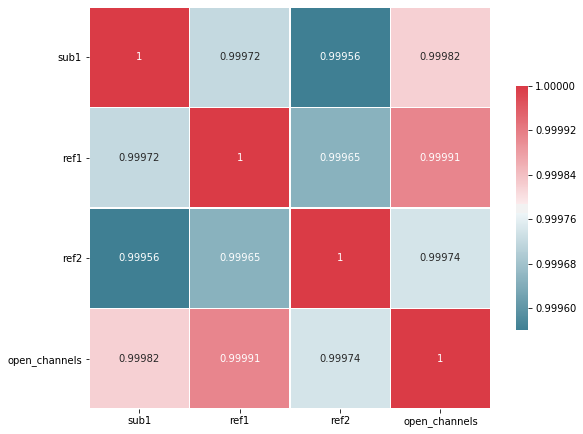

In [11]:
# Compute the correlation matrix
corr = sub.corr().round(5)

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(9, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, cmap=cmap, annot=True, fmt="g",
            square=True, linewidths=.5, cbar_kws={"shrink": .5}, ax=ax)
ax.set_ylim(corr.shape[0], 0)
plt.yticks(rotation=0)

In [7]:
sub["open_channels"] = np.round((sub["sub1"] + sub["ref1"] + sub["ref2"]) / 3)

the_sub = pd.read_csv('../input/sample_submission.csv', dtype={'time': np.float32})
the_sub["open_channels"] = sub["open_channels"].astype(int)
the_sub.to_csv('../submissions/blend2.csv', index=False, float_format='%.4f')

In [8]:
the_sub.head()

,time,open_channels
0,500.000092,0
1,500.000214,0
2,500.000305,0
3,500.000397,0
4,500.000488,0


In [9]:
the_sub.open_channels.unique()

array([ 0,  1,  2,  3,  4,  5, 10,  9,  8,  7,  6])